### 聚类算法实践
- Kmeans 和 DBSCAN 算法
- 半监督问题解决方案
- 聚类算法的评估

![各种聚类算法的呈献](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)


In [8]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
# np.random.seed(42)

Kmeans 算法

In [376]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [377]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                    cluster_std=blob_std)
y

array([4, 2, 4, ..., 3, 0, 0])

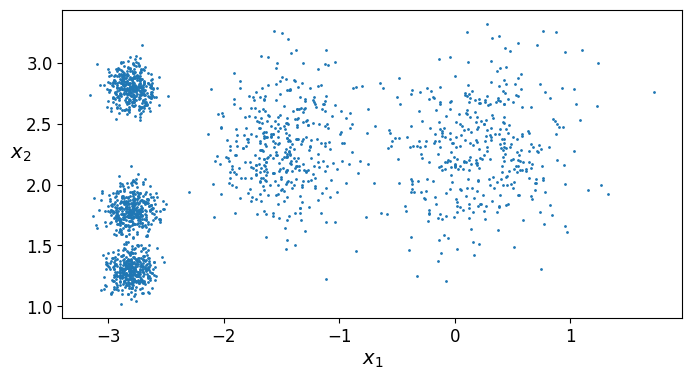

In [378]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

决策边界

In [379]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [380]:
y_pred

array([4, 4, 4, ..., 1, 0, 0], dtype=int32)

In [381]:
kmeans.labels_

array([4, 4, 4, ..., 1, 0, 0], dtype=int32)

In [382]:
kmeans.cluster_centers_

array([[ 0.22733282,  2.28672185],
       [-2.79924793,  2.79388725],
       [-2.7976513 ,  1.79486416],
       [-1.47150638,  2.31277795],
       [-2.80384826,  1.29497917]])

In [383]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 1, 1], dtype=int32)

In [384]:
kmeans.transform(X_new)

array([[0.36590932, 2.90964704, 2.80516194, 1.50438063, 2.89112771],
       [2.78745272, 5.85333524, 5.80127928, 4.4824323 , 5.84651255],
       [3.3052145 , 0.28772185, 1.22200548, 1.67587795, 1.71626674],
       [3.23437239, 0.35590885, 0.73359495, 1.53991716, 1.22088112]])

In [385]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=20, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=20, linewidths=25,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                                show_xlabels=True, show_ylabels=True):
        mins = X.min(axis=0) - 0.1
        maxs = X.max(axis=0) + 0.1
        xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                             np.linspace(mins[1], maxs[1], resolution))
        Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
        plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                    cmap="Pastel2")
        plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                    linewidths=1, colors='k')
        plot_data(X)
        if show_centroids:
            plot_centroids(clusterer.cluster_centers_)
    
        if show_xlabels:
            plt.xlabel("$x_1$", fontsize=14)
        else:
            plt.tick_params(labelbottom=False)
        if show_ylabels:
            plt.ylabel("$x_2$", fontsize=14, rotation=0)
        else:
            plt.tick_params(labelleft=False)


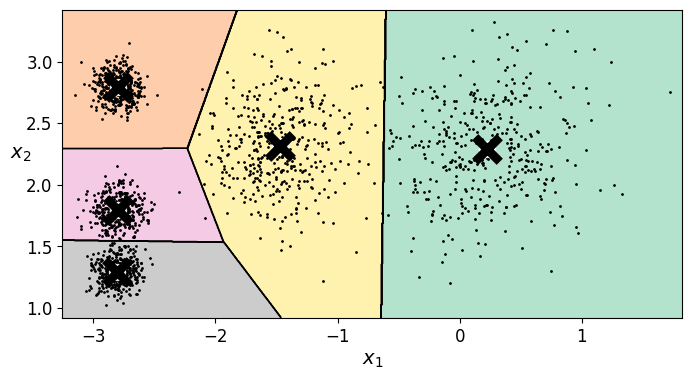

In [386]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


算法流程

In [387]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

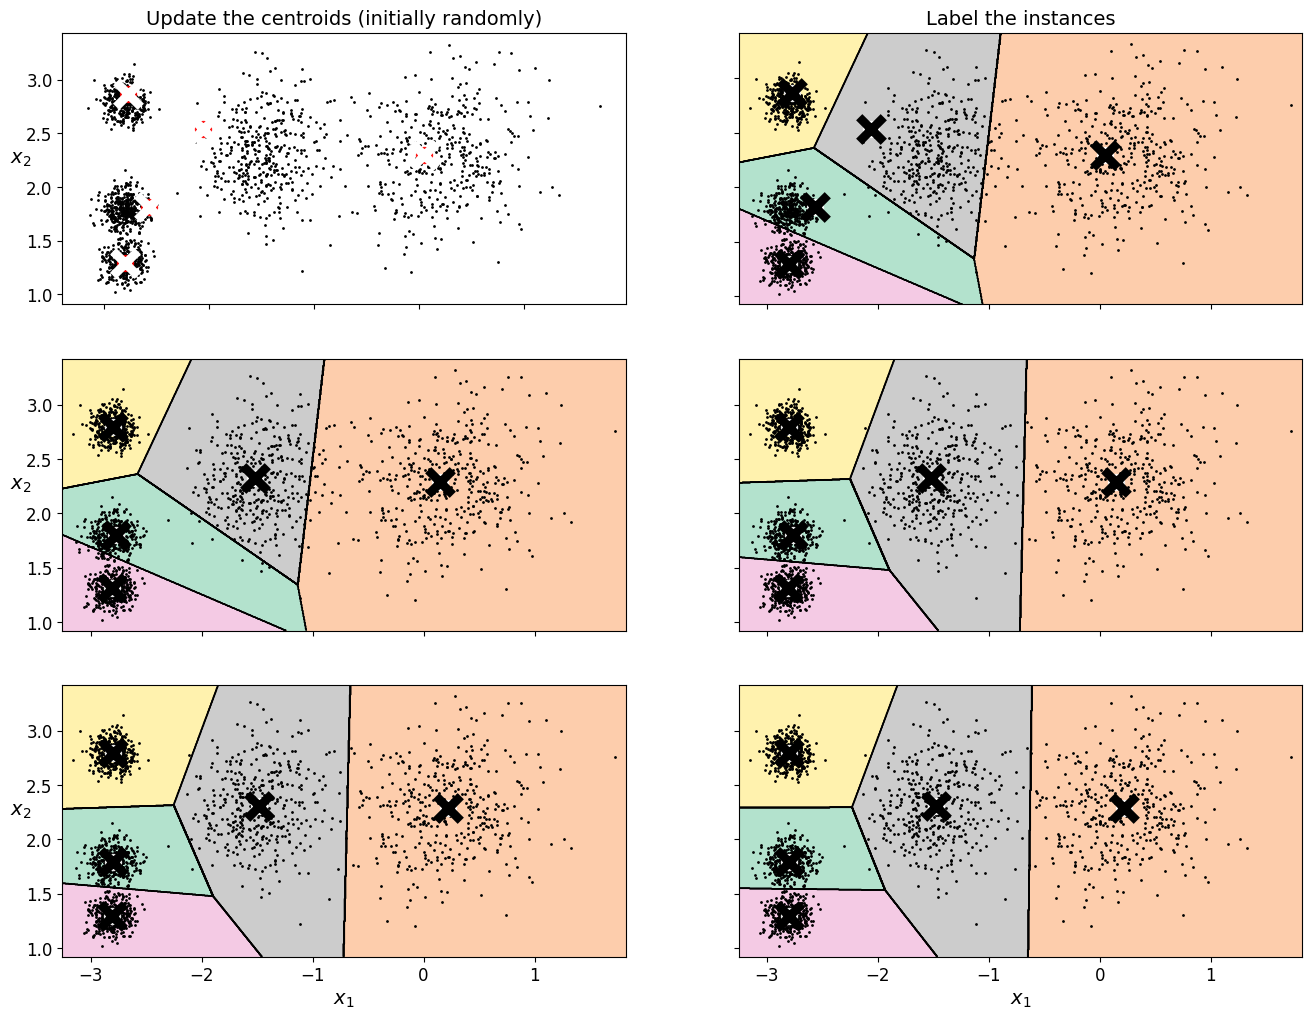

In [388]:
plt.figure(figsize=(16, 12))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.tick_params(labelbottom=False)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

不稳定的结果

In [389]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

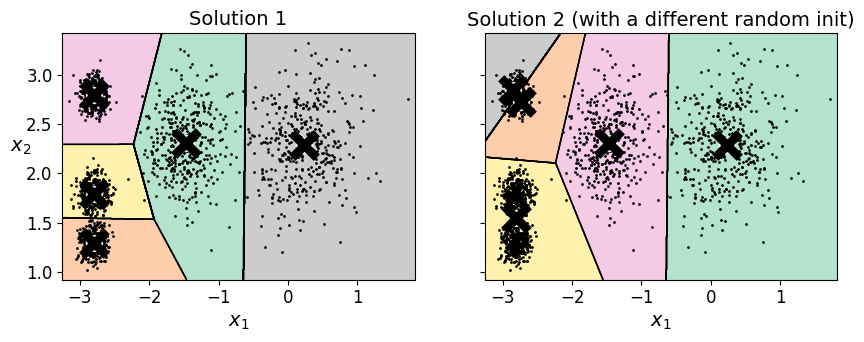

In [390]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                            random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                            "Solution 1", "Solution 2 (with a different random init)")


评估标准
- Inertia指标: 每个样本到其簇中心的距离的平方和

In [391]:
kmeans.inertia_

224.3040665455943

In [393]:
x_dist = kmeans.transform(X)

In [394]:
x_dist[np.arange(len(X)), kmeans.labels_]**2

array([0.00625676, 0.04997527, 0.03729271, ..., 0.03532216, 0.21405546,
       0.04785896])

In [395]:
np.sum(x_dist[np.arange(len(X)), kmeans.labels_]**2)

np.float64(224.3040665455934)

In [397]:
-kmeans.score(X)

224.3040665455943

In [398]:
kmeans_rnd_init1.inertia_

224.3040665455943

In [399]:
kmeans_rnd_init2.inertia_

271.2567010009369

### 选择最佳k值
k越大,评估值越小,但是不一定是最佳的 


In [401]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

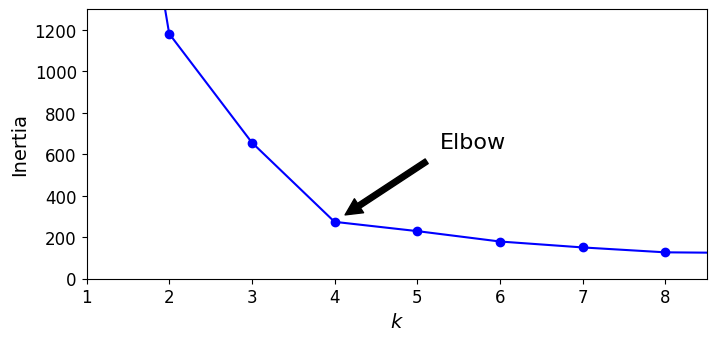

In [402]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis((1, 8.5, 0, 1300))
plt.show()


### 轮廓系数
- 轮廓系数是一种衡量聚类效果的指标
- ai: 样本i到同簇其他样本的平均距离, ai越小,说明样本i越应该被聚类到该簇. ai被称为样本i的簇内不相似度
- bi: 样本i到其他某簇Cj的所有样本的平均距离,称为样本i与其他簇的不相似度,bi越大,说明样本i越不属于其他簇:  $bi=min_{i!=j}bi$  
        
  $s(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}$    
                          
结论:
- s(i)接近1,说明样本i分类合理
- s(i)接近-1,说明样本i分类不合理
- s(i)接近0,说明样本i在两个簇的边界上

In [403]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)


np.float64(0.6472481649785387)

In [404]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

Text(0.5, 0, '$k$')

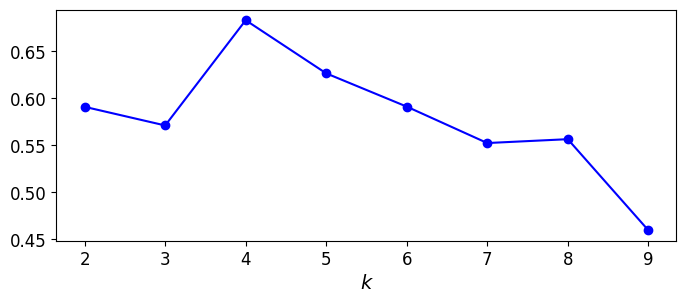

In [406]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)



Kmeans存在的问题

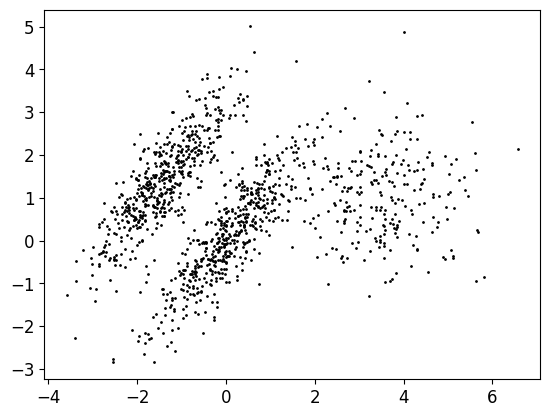

In [407]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_data(X)

In [412]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=1, max_iter=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(max_iter=3, n_clusters=3, n_init=1, random_state=42)

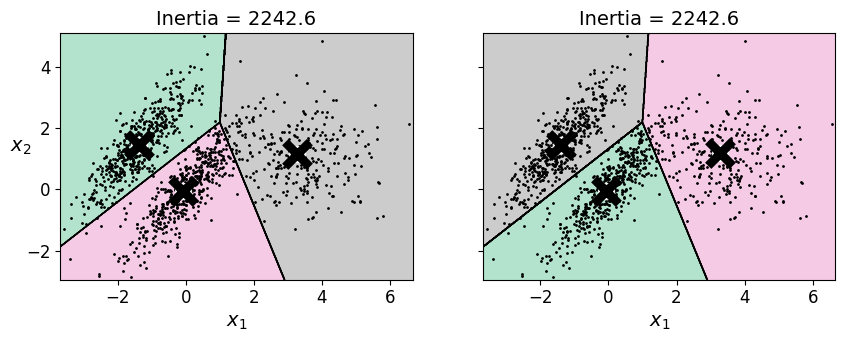

In [413]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

图像分割

In [418]:
from matplotlib.image import imread
image = imread('E:\Project\data\ladybug.png')
image.shape

(533, 800, 3)

In [424]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [425]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [426]:
kmeans.cluster_centers_

array([[0.02199069, 0.10830453, 0.00567974],
       [0.98304534, 0.9326791 , 0.0255405 ],
       [0.2132627 , 0.38076016, 0.05517572],
       [0.6082821 , 0.6286249 , 0.3858063 ],
       [0.3667924 , 0.5195236 , 0.15321174],
       [0.09567662, 0.24869077, 0.01605228],
       [0.765193  , 0.19927897, 0.04392379],
       [0.87610084, 0.71743155, 0.03685827]], dtype=float32)

In [429]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)

In [431]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)
    segmented_imgs.append(segmented_img)

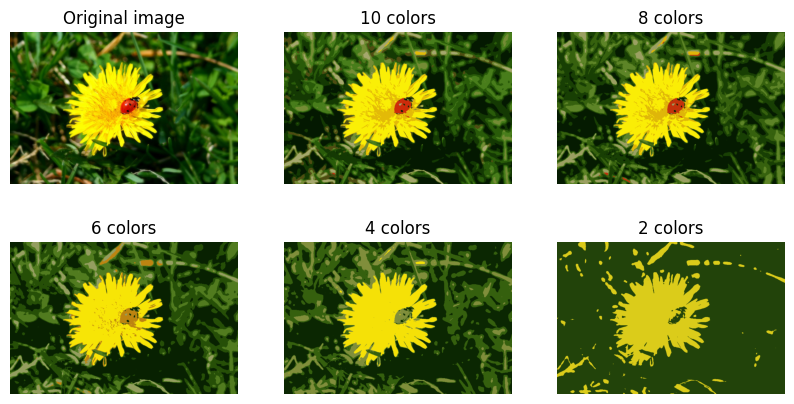

In [435]:
plt.figure(figsize=(10, 5))

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### 半监督学习   
首先，将训练集聚类为50个集群，然后对于每个聚类，找到最接近质心的图像， 将图像称为代表图像

In [3]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
n_labels = 50

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labels], y_train[:n_labels])
log_reg.score(X_test, y_test)

0.8266666666666667

In [5]:
from sklearn.cluster import KMeans
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [6]:
X_digits_dist.shape

(1347, 50)

In [10]:
representative_digits = np.argmin(X_digits_dist, axis=0)

绘制代表图像，手动标记

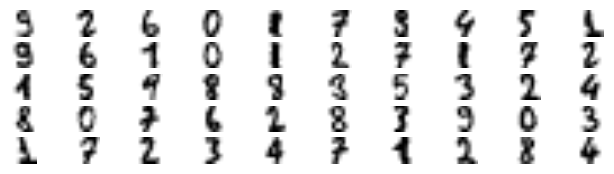

In [11]:
plt.figure(figsize=(8, 2))
for index, representative_digit in enumerate(representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_train[representative_digit].reshape(8, 8), cmap='binary', interpolation='bilinear')
    plt.axis('off')
    
plt.show()

In [24]:
y_representative_digits = np.array([
    9, 2, 6, 0, 1, 7, 8, 4, 5, 1,
    9, 6, 1, 0, 1, 2, 7, 1, 7, 2,
    1, 5, 9, 8, 8, 3, 5, 3, 2, 4,
    8, 0, 7, 6, 2, 8, 3, 9, 0, 3,
    1, 7, 2, 3, 4, 7, 1, 2, 8, 4])

现在 我 们 有 一 个 只 有 50 个 标记 实例 的 数据 集 ， 它 们 中 的 每 一 个 都 是 其 集群 的 代表 性 图 像 ， 而 不 是 完全 随机 的 实例 。 让 我 们 看 看 性 能 是 否 更 好 :

In [25]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[representative_digits], y_representative_digits)
log_reg.score(X_test, y_test)

0.9244444444444444

标签传播

In [26]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9333333333333333

In [27]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1


In [28]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [29]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(random_state=42)

In [30]:
log_reg.score(X_test, y_test)

0.9355555555555556